# Logistic Regression - Math Overview

Logistic regression models the **probability** that a given input `x` belongs to class 1.

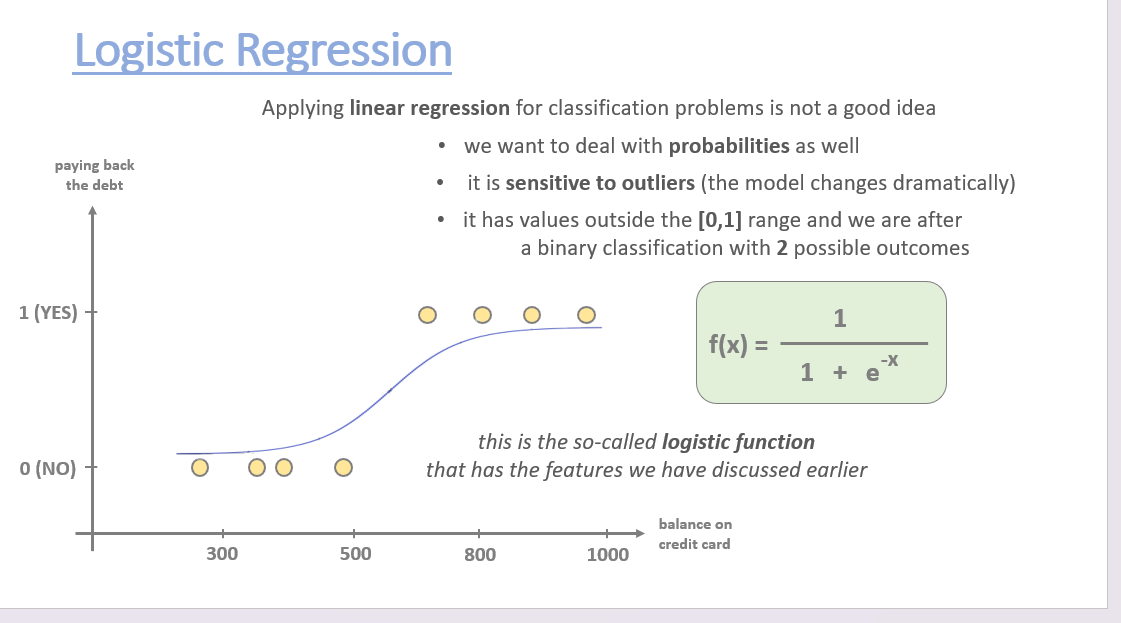

## 1. Hypothesis Function

Instead of predicting directly, we apply the **sigmoid function** to a linear combination of features:

h(x) = 1 / (1 + exp(-z))  
where z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ

- Output `h(x)` ∈ (0, 1) → interpreted as probability of class 1

## 2. Decision Rule

If h(x) ≥ 0.5 → predict class 1  
If h(x) < 0.5 → predict class 0

## 3. Loss Function (Log Loss / Binary Cross-Entropy)

To train the model, we minimize the **log loss**:

Loss = -[y * log(h(x)) + (1 - y) * log(1 - h(x))]

This penalizes wrong confident predictions heavily.

## 4. Optimization

We use **Gradient Descent** to update weights `w` and minimize the loss across all data points.

Repeat until convergence:  
    w := w - α * ∂Loss/∂w

---

**Use Case**: Best suited for **binary classification** where the output is 0 or 1.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data/credit_data.csv')
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


This dataset is commonly used for binary classification, where the goal is to predict whether a client will default on a loan based on features like income, age, and loan amount.

In [2]:
df.corr()

,clientid,income,age,loan,default
clientid,1.000000,0.039280,-0.014704,0.018931,-0.020145
income,0.039280,1.000000,-0.033687,0.441117,0.002284
age,-0.014704,-0.033687,1.000000,0.002309,-0.429759
loan,0.018931,0.441117,0.002309,1.000000,0.377160
default,-0.020145,0.002284,-0.429759,0.377160,1.000000


age and income seems to have negative correlation, higher the age, lower the income.

age and loan have a positive correlation.

In [7]:
df.dropna(inplace=True)
features = df[['age', 'income', 'loan']]
target = df['default']

print(features.shape, target.shape)

(1997, 3) (1997,)


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(Xtrain, ytrain)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
ypred = model.predict(Xtest)

In [10]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(ytest, ypred))

Accuracy: 0.9375


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[331,   8],
       [ 17,  44]])

In [14]:
model.coef_ #w1, w2, w3

array([[-2.47781762e-01, -1.87890260e-04,  1.32571785e-03]])

In [15]:
model.intercept_

array([6.89876143])

##  Confusion Matrix (Binary Classification)

|                   | Predicted: Negative (0) | Predicted: Positive (1) |
|-------------------|--------------------------|---------------------------|
| Actual: Negative (0) | True Negative (TN)       | False Positive (FP)        |
| Actual: Positive (1) | False Negative (FN)      | True Positive (TP)         |

---

True Positive = The number of cases where the model predicted Positive and the actual value is also Positive.

True Negative = The number of cases where the model predicted Negative and the actual value is also Negative.

## Accuracy 

(TN + TP)/(Total Cases)
##  Precision

- **What it means**: Out of all positive predictions, how many were correct?
- **Formula**: `Precision = TP / (TP + FP)`
- **When to use it**:  
  You care more about avoiding false positives.

**Examples**:
-  **Spam Detection**: Don’t mark real emails as spam.

A model with high precision is very good at avoiding mistakes when it says “yes.” This is important in situations where false alarms are a big problem. For example:

In spam email detection it's better if real emails don't get wrongly marked as spam.
We care more about getting the important emails right than stopping every single spam message.
So in these cases a model that gives fewer wrong "yes" answers is more useful.

---

##  Recall

- **What it means**: Out of all actual positives, how many did the model catch?
- **Formula**: `Recall = TP / (TP + FN)`
- **When to use it**:  
  You care more about catching all actual positives.

**Examples**:
Healthcare: High recall is essential to avoid missing cases for severe medical conditions like cancer.

Cybersecurity: High recall in threat detection helps minimize the risk of missing breaches
---

##  Link to Confusion Matrix

| Case | What happens |
|------|--------------|
| High FP | ➝ Precision drops (lots of false alarms) |
| High FN | ➝ Recall drops (missed true cases) |
| High TP | ➝ Both precision and recall improve |
| High TN | ➝ Doesn't affect precision/recall directly but improves accuracy |

---
> Use **Precision** when false alarms are expensive.  
> Use **Recall** when missing a positive case is dangerous.


### F1 Score in Classification

The **F1 score** is a key metric used to evaluate classification models, especially when the classes are **imbalanced**.

 Definition

The **F1 score** is the **harmonic mean** of **Precision** and **Recall**:

F1 = 2 * (Precision * Recall) / (Precision + Recall)

balances precision and recall

# Does Logistic Regression Have a Linear Decision Boundary?

Yes — Logistic Regression creates a linear decision boundary.

## How?

Although it outputs probabilities using the sigmoid function, the classification decision is based on:

P(y = 1 | x) = 1 / (1 + exp(- (wᵗx + b)))

A sample is classified as class 1 if:

wᵗx + b ≥ 0

This is the equation of a hyperplane — a straight line in 2D, a plane in 3D, etc.

## Summary

| Aspect              | Explanation                              |
|---------------------|------------------------------------------|
| Output              | Probability (via sigmoid)                |
| Decision threshold  | 0.5                                      |
| Decision boundary   | Linear (wᵗx + b = 0)                     |

To handle non-linear boundaries, you can add polynomial features or use non-linear models like SVM with RBF, decision trees, or neural networks.


# Overfitting, Underfitting, and Cross-Validation

## Overfitting
- The model learns the **training data too well**, including noise and outliers.
- It performs well on training data but **poorly on unseen (test) data**.
- Symptoms: High training accuracy, low test accuracy.
Variance is high, bias is high

## Underfitting
- The model is **too simple** to capture the underlying pattern in the data.
- It performs poorly on both training and test data.
- Symptoms: Low accuracy on training and test sets.
Bias is high, variance is low.

## Cross-Validation
- A technique to **evaluate model performance** more reliably.
- Common method: **k-Fold Cross-Validation**
  - Split data into *k* parts
  - Train on *k-1* parts, test on the remaining
  - Repeat *k* times and average the results
- All observations are seen both in training and testing.

### Why Use Cross-Validation?
- Helps detect **overfitting/underfitting**
- Provides a better estimate of how the model generalizes to new data
- Reduces bias from a single train-test split

## Summary

| Concept         | Description                                | Goal                         |
|-----------------|--------------------------------------------|------------------------------|
| Overfitting     | Too complex, memorizes training data       | Improve generalization       |
| Underfitting    | Too simple, misses patterns                | Increase model complexity    |
| Cross-Validation| Robust model evaluation                    | Reliable performance estimate|


In [16]:
import numpy as np
df1=pd.read_csv('data/credit_data.csv')
df1.dropna(inplace=True)
df1.dropna(inplace=True)
features = df1[['age', 'income', 'loan']]
target = df1['default']

print(features.shape, target.shape)

(1997, 3) (1997,)


In [22]:
X=np.reshape(features.values,(-1,3))
y=np.array(target)

In [23]:
model=LogisticRegression()
from sklearn.model_selection import cross_validate
predicted= cross_validate(model, X, y, cv=5)

In [24]:
predicted

{'fit_time': array([0.10169888, 0.04929471, 0.04277182, 0.03696513, 0.04593253]),
 'score_time': array([0.00201416, 0.00099421, 0.00100017, 0.00054216, 0.00100446]),
 'test_score': array([0.945     , 0.9425    , 0.96240602, 0.93483709, 0.94486216])}

test score is the score on each of the test set in each cross validation run.

In [25]:
np.mean(predicted['test_score'])

np.float64(0.945921052631579)